## Import

In [1]:
import pandas as pd
import numpy as np
import os
import json


from itertools import takewhile, dropwhile
from collections import Counter

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import dataframes_util as ut

# Import base dataframe and controlled users

In [2]:
if (not os.path.isfile('../tweets.csv')):
    %run Tweet_preparation.ipynb

dfPosts = pd.read_csv('../tweets.csv',low_memory=False)

In [3]:
dfPosts

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,user_code_error,rt_user_code_error,in_reply_to_user_code_error,is_self_rt,user_url_cred,rt_user_url_cred,in_reply_to_user_url_cred
0,1311804409903484930,1311804409903484930,Thu Oct 01 23:05:18 +0000 2020,1035959506700783618,alessia_smile6,False,Sat Sep 01 18:36:08 +0000 2018,Altri tre giorni di blocco per aver citato un ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,1311813787159130117,1311813787159130117,Thu Oct 01 23:42:33 +0000 2020,113584953,GiornaledPuglia,False,Fri Feb 12 09:11:24 +0000 2010,"Covid, vaccino AstraZeneca alla prova dell'Age...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2,1311805637303644161,1311805637303644161,Thu Oct 01 23:10:10 +0000 2020,1279710942020984832,TestPerTutti,False,Sun Jul 05 09:37:48 +0000 2020,https://t.co/oQZpHUBKrt,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.00,1.00,NaN
3,1311798617578049538,1311798617578049538,Thu Oct 01 22:42:17 +0000 2020,1215779772762148865,CapitanHarlok6,False,Fri Jan 10 23:37:56 +0000 2020,"""Dobbiamo resistere con il coltello tra i dent...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.90,NaN,NaN
4,1311806869917388801,1311806869917388801,Thu Oct 01 23:15:04 +0000 2020,2660808424,soteros1,False,Tue Jul 01 17:29:02 +0000 2014,Se volevate sapere perché Burioni viene invita...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.62,0.77,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053196,1394609996197937159,1394609996197937159,Tue May 18 11:05:08 +0000 2021,464822421,CiaoGrosso,False,Sun Jan 15 17:25:21 +0000 2012,Il medico testimonial pro vaccino a @Ariacheti...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,102577.0,1060.0,1114.0,NaN,NaN,NaN,False,0.33,1.00,NaN
4053197,1394610015823147011,1394610015823147011,Tue May 18 11:05:13 +0000 2021,497188910,Rosskitty77,False,Sun Feb 19 18:26:36 +0000 2012,"""...«Ha lividi e piastrine basse». E ha richie...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,79297.0,772.0,893.0,NaN,NaN,NaN,False,0.58,NaN,NaN
4053198,1394609887641022464,1394609887641022464,Tue May 18 11:04:42 +0000 2021,955571652468801536,GuidoIafrate,False,Mon Jan 22 22:43:30 +0000 2018,"Vaccinazioni nei luoghi di lavoro, fondamental...","<a href=""http://twitter.com/download/android"" ...",NaN,...,655.0,226.0,55.0,NaN,NaN,NaN,False,NaN,NaN,NaN
4053199,1394609899963830275,1394609899963830275,Tue May 18 11:04:45 +0000 2021,57358236,lucabattanta,False,Thu Jul 16 15:14:03 +0000 2009,A #lariachetira c’è un MEDICO DI BASE che ha a...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,517677.0,13671.0,20847.0,NaN,NaN,NaN,False,0.81,0.89,NaN


In [4]:
data = pd.read_csv('listControlledUsers.csv')  
userNovax = list(data[data['malicious']].iloc[:,0])
userProvax = list(data[data['benevolent']].iloc[:,0])

## Filtered by retweet (with the same graph)

In [5]:
print ("Novax - Generation ",0, ": ",len(userNovax))
print ("Provax - Generation ",0, ": ",len(userProvax))

Novax - Generation  0 :  57
Provax - Generation  0 :  24


In [6]:
dfRetweet = ut.retweet_rate_novax(dfPosts,userNovax,userProvax)

No handles with labels found to put in legend.


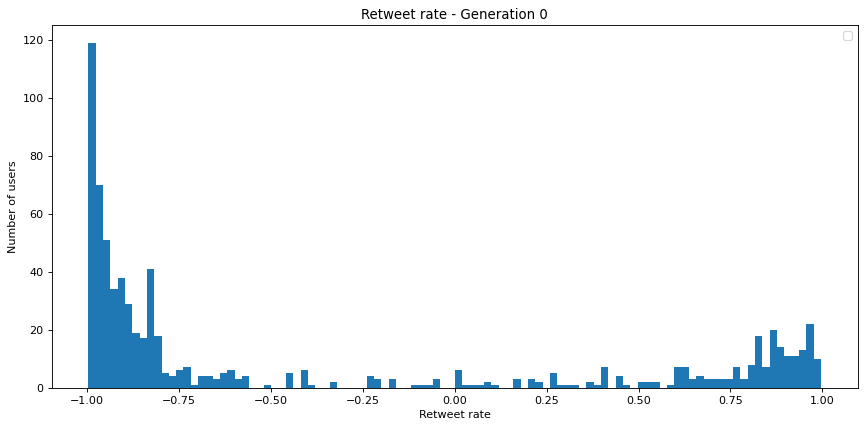

In [7]:
figure(figsize=(13, 6), dpi=80)
percent_choosen_provax = 0.78
percent_choosen_novax = -0.74


plt.hist(dfRetweet["provax_perc"],bins=100)
#plt.axvline(percent_choosen_provax,color='green',ls=':',label="Percent choosen (provax) - %.2f"%percent_choosen_provax)
#plt.axvline(percent_choosen_novax,color='red',ls=':',label="Percent choosen (novax) - %.2f"%percent_choosen_novax)


plt.xlabel('Retweet rate')
plt.ylabel("Number of users")
plt.title("Retweet rate - Generation 0")

plt.legend()
plt.show()

In [8]:
#userNovax = userNovax + list(dfRetweet[dfRetweet['novax_perc']<=percent_choosen_novax].index)
#userProvax = userProvax + list(dfRetweet[dfRetweet['provax_perc']>=percent_choosen_provax].index)
userNovax = userNovax + list(dfRetweet[dfRetweet['provax_perc']<=-0.95].index)
userProvax = userProvax + list(dfRetweet[dfRetweet['provax_perc']>=0.95].index)

print ("Novax - Generation ",0, ": ",len(userNovax))
print ("Provax - Generation ",0, ": ",len(userProvax))

Novax - Generation  0 :  268
Provax - Generation  0 :  60


In [9]:
dfRetweet = ut.retweet_rate_novax(dfPosts,userNovax,userProvax)

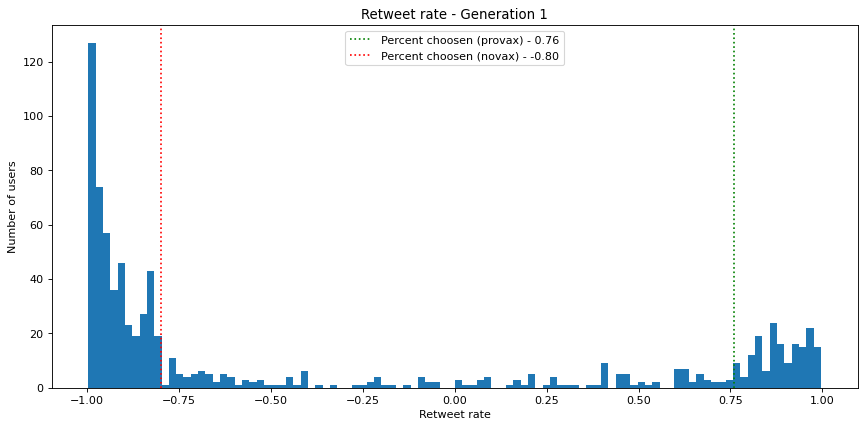

In [25]:
figure(figsize=(13, 6), dpi=80)
percent_choosen_provax = 0.76
percent_choosen_novax = -0.80


plt.hist(dfRetweet["provax_perc"],bins=100)
plt.axvline(percent_choosen_provax,color='green',ls=':',label="Percent choosen (provax) - %.2f"%percent_choosen_provax)
plt.axvline(percent_choosen_novax,color='red',ls=':',label="Percent choosen (novax) - %.2f"%percent_choosen_novax)


plt.xlabel('Retweet rate')
plt.ylabel("Number of users")
plt.title("Retweet rate - Generation 1")

plt.legend()
plt.show()

In [11]:
dfNovax = dfPosts[dfPosts.isin(userNovax)['user_screen_name']].copy()
dfProvax = dfPosts[dfPosts.isin(userProvax)['user_screen_name']].copy()

# .CSV Creation 

### Novax

In [12]:
dfNovax.drop_duplicates(['id'],inplace=True)
dfNovax

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,user_code_error,rt_user_code_error,in_reply_to_user_code_error,is_self_rt,user_url_cred,rt_user_url_cred,in_reply_to_user_url_cred
39,1311807788759343105,1311807788759343105,Thu Oct 01 23:18:43 +0000 2020,351555225,laltraguanciama,False,Tue Aug 09 12:20:09 +0000 2011,È stato annunciato che il vaccino italo-ingles...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.44,NaN,NaN
69,1311803431275900935,1311803431275900935,Thu Oct 01 23:01:24 +0000 2020,1260518365,_A_mors,False,Mon Mar 11 22:03:31 +0000 2013,"https://t.co/t26g6Z9iaF\nAdesso è il tampone, ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.54,NaN,NaN
106,1311792151345405953,1311792151345405953,Thu Oct 01 22:16:35 +0000 2020,2173072229,DoctorWho744,False,Fri Nov 08 08:10:46 +0000 2013,Se volevate sapere perché Burioni viene invita...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.71,0.77,NaN
107,1311793381815848963,1311793381815848963,Thu Oct 01 22:21:28 +0000 2020,222603056,storm19737,False,Fri Dec 03 22:13:42 +0000 2010,"Elon #Musk: «No al vaccino per il #Covid, nean...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.75,0.97,NaN
135,1311795785898614786,1311795785898614786,Thu Oct 01 22:31:02 +0000 2020,2288557992,Z3r0Rules,False,Sun Jan 12 19:07:34 +0000 2014,Molti stanno credendo alla balla che il #vacci...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.57,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053185,1394609933614788611,1394609933614788611,Tue May 18 11:04:53 +0000 2021,710554164770816000,vallant80,False,Thu Mar 17 19:51:29 +0000 2016,"Ma avete fatto caso che, politici e giornalist...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,21996.0,548.0,808.0,NaN,NaN,NaN,False,NaN,0.34,NaN
4053192,1394609978904809475,1394609978904809475,Tue May 18 11:05:04 +0000 2021,1285866977693700096,Obsolete_LG,False,Wed Jul 22 09:19:28 +0000 2020,Il medico testimonial pro vaccino a @Ariacheti...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,17557.0,481.0,227.0,NaN,NaN,NaN,False,NaN,1.00,NaN
4053194,1394609998047580161,1394609998047580161,Tue May 18 11:05:08 +0000 2021,1285866977693700096,Obsolete_LG,False,Wed Jul 22 09:19:28 +0000 2020,@borghi_claudio @Ariachetira Scegliere chi cur...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,17557.0,481.0,227.0,NaN,NaN,NaN,False,NaN,NaN,NaN
4053197,1394610015823147011,1394610015823147011,Tue May 18 11:05:13 +0000 2021,497188910,Rosskitty77,False,Sun Feb 19 18:26:36 +0000 2012,"""...«Ha lividi e piastrine basse». E ha richie...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,79297.0,772.0,893.0,NaN,NaN,NaN,False,0.58,NaN,NaN


### High credibility

In [13]:
dfProvax.drop_duplicates(['id'],inplace=True)
dfProvax

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,user_code_error,rt_user_code_error,in_reply_to_user_code_error,is_self_rt,user_url_cred,rt_user_url_cred,in_reply_to_user_url_cred
279,1311777890242043904,1311777890242043904,Thu Oct 01 21:19:55 +0000 2020,1341462944,paoloigna1,False,Wed Apr 10 09:29:25 +0000 2013,☑️Analisi GIMBE: alcune #regioni non possono g...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.99,1.00,NaN
313,1311775110534234118,1311775110534234118,Thu Oct 01 21:08:52 +0000 2020,750670310,57Davide,False,Sat Aug 11 04:51:36 +0000 2012,Tamponi e vaccini antinfluenzali devono essere...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.00,NaN,NaN
321,1311777106309906434,1311777106309906434,Thu Oct 01 21:16:48 +0000 2020,1341462944,paoloigna1,False,Wed Apr 10 09:29:25 +0000 2013,https://t.co/Tq1ZzOiCYr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.99,NaN,NaN
344,1311777857077641216,1311777857077641216,Thu Oct 01 21:19:47 +0000 2020,1341462944,paoloigna1,False,Wed Apr 10 09:29:25 +0000 2013,👉Ministero ha giustamente raccomandato #vaccin...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.99,0.97,NaN
370,1311770686399094786,1311770686399094786,Thu Oct 01 20:51:17 +0000 2020,540066448,mbbelluco,False,Thu Mar 29 15:34:53 +0000 2012,Bill Gates: «Vaccino anti-Covid per tutti o sa...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051686,1394592692223496192,1394592692223496192,Tue May 18 09:56:22 +0000 2021,2268796084,patriziadegioia,False,Wed Jan 08 13:10:37 +0000 2014,La chiave era cambiare Conte e Arcuri per vede...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,70844.0,22.0,372.0,NaN,NaN,NaN,False,0.96,NaN,NaN
4052376,1394602413831688194,1394602413831688194,Tue May 18 10:35:00 +0000 2021,1612753232,iannetts70,False,Mon Jul 22 12:37:56 +0000 2013,Ansa: “Negli Usa quasi due terzi della disinfo...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,101141.0,5196.0,6591.0,NaN,NaN,NaN,False,0.94,NaN,NaN
4052625,1394604459175694336,1394604459175694336,Tue May 18 10:43:08 +0000 2021,1530871844,CardelliAc,False,Wed Jun 19 13:32:54 +0000 2013,"Oh ma, c’è ancora qualcuno che a proposito di ...","<a href=""http://twitter.com/download/android"" ...",NaN,...,124918.0,3590.0,2715.0,NaN,NaN,NaN,False,0.97,NaN,NaN
4052938,1394607987923247107,1394607987923247107,Tue May 18 10:57:09 +0000 2021,1068464303253131265,robkapfas,False,Fri Nov 30 11:18:35 +0000 2018,Ansa: “Negli Usa quasi due terzi della disinfo...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,15784.0,3018.0,783.0,NaN,NaN,NaN,False,1.00,NaN,NaN


### Other user

In [14]:
idNovax = dfNovax.groupby('id').first().index
dfOtherElem = dfPosts[dfPosts['id'].isin(idNovax) == False]

idProvax = dfProvax.groupby('id').first().index
dfOtherElem = dfOtherElem[dfOtherElem['id'].isin(idProvax) == False]

dfOtherElem

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,user_code_error,rt_user_code_error,in_reply_to_user_code_error,is_self_rt,user_url_cred,rt_user_url_cred,in_reply_to_user_url_cred
0,1311804409903484930,1311804409903484930,Thu Oct 01 23:05:18 +0000 2020,1035959506700783618,alessia_smile6,False,Sat Sep 01 18:36:08 +0000 2018,Altri tre giorni di blocco per aver citato un ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,1311813787159130117,1311813787159130117,Thu Oct 01 23:42:33 +0000 2020,113584953,GiornaledPuglia,False,Fri Feb 12 09:11:24 +0000 2010,"Covid, vaccino AstraZeneca alla prova dell'Age...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2,1311805637303644161,1311805637303644161,Thu Oct 01 23:10:10 +0000 2020,1279710942020984832,TestPerTutti,False,Sun Jul 05 09:37:48 +0000 2020,https://t.co/oQZpHUBKrt,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.00,1.00,NaN
3,1311798617578049538,1311798617578049538,Thu Oct 01 22:42:17 +0000 2020,1215779772762148865,CapitanHarlok6,False,Fri Jan 10 23:37:56 +0000 2020,"""Dobbiamo resistere con il coltello tra i dent...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.90,NaN,NaN
4,1311806869917388801,1311806869917388801,Thu Oct 01 23:15:04 +0000 2020,2660808424,soteros1,False,Tue Jul 01 17:29:02 +0000 2014,Se volevate sapere perché Burioni viene invita...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.62,0.77,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053193,1394609894700064771,1394609894700064771,Tue May 18 11:04:44 +0000 2021,171756510,neghittoso,False,Wed Jul 28 02:48:49 +0000 2010,@AndreaBeltrameJ @prokofiev91 @gred_vet @carlo...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,11676.0,527.0,280.0,NaN,NaN,NaN,False,NaN,NaN,NaN
4053195,1394610031262306304,1394610031262306304,Tue May 18 11:05:16 +0000 2021,4309630395,Ileana0406,False,Sat Nov 28 18:18:40 +0000 2015,"Vaccini, nuovo errore di somministrazione in T...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,21105.0,1130.0,833.0,NaN,NaN,NaN,False,NaN,1.00,NaN
4053196,1394609996197937159,1394609996197937159,Tue May 18 11:05:08 +0000 2021,464822421,CiaoGrosso,False,Sun Jan 15 17:25:21 +0000 2012,Il medico testimonial pro vaccino a @Ariacheti...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,102577.0,1060.0,1114.0,NaN,NaN,NaN,False,0.33,1.00,NaN
4053198,1394609887641022464,1394609887641022464,Tue May 18 11:04:42 +0000 2021,955571652468801536,GuidoIafrate,False,Mon Jan 22 22:43:30 +0000 2018,"Vaccinazioni nei luoghi di lavoro, fondamental...","<a href=""http://twitter.com/download/android"" ...",NaN,...,655.0,226.0,55.0,NaN,NaN,NaN,False,NaN,NaN,NaN


### Write dataframe to .csv

In [15]:
dfProvax.to_csv('retweet_class_same-graph/tweets_provax.csv', index=False)

In [16]:
dfNovax.to_csv('retweet_class_same-graph/tweets_novax.csv', index=False)

In [17]:
dfOtherElem.to_csv('retweet_class_same-graph/tweets_otherUser.csv', index=False)

In [18]:
#Extract to another dataframe info about doubled classified users
doubled_class = set(list(np.array(dfNovax['user_id'])[pd.Series(dfNovax['user_id']).isin(dfProvax['user_id'])]))
dfDoubled = dfPosts[dfPosts['user_id'].isin(doubled_class)]

dfDoubled.to_csv('retweet_class_same-graph/tweets_doubled_classified.csv', index=False)

In [19]:
len(doubled_class)

0

In [21]:
if len(doubled_class) == 0:
    dfOtherElem.to_csv('../7.1_Generation_1_95/tweets_otherUser_100.csv', index=False)
    dfNovax.to_csv('../7.1_Generation_1_95/tweets_novax_100.csv', index=False)
    dfProvax.to_csv('../7.1_Generation_1_95/tweets_provax_100.csv', index=False)
    print('csv writed in 100% study')

csv writed in 100% study
